# About
Roughwork code for comparing BTC and ETH returns.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import fattails.metrics as fattails

Datasource:
* BTC: https://www.coindesk.com/price/bitcoin
* ETH: https://www.coindesk.com/price/ethereum

In [2]:
btc_filepath = '../data/crypto/BTCUSD_CoinDesk_2013-10-01_2021-05-08.csv'
eth_filepath = '../data/crypto/ETHUSD_CoinDesk_2015-08-09_2021-05-08.csv'

# Setup

In [3]:
def prices_to_returns(prices):
    """ Convert price data into percentage return data.

    Each data entry is replaced by it's percentage change 
    vs. the entry before it.
    
    Parameters
    ----------
    sr : pd.Series
        Price data.

    Returns
    -------
    returns : pd.Series
        Percentage return data.
        
    Example
    -------
    >>> # Initialise a price series
    >>> prices = pd.Series([100, 101, 100, 125])
    0    100
    1    101
    2    100
    3    125
    dtype: int64
    >>> # Convert Prices to Returns
    >>> convert_prices_to_returns(prices)
    1    0.010000
    2   -0.009901
    3    0.250000
    dtype: float64
    """
    # Caluculate Returns
    previous_prices = prices.shift(1)
    returns = prices / previous_prices - 1
    
    # Remove First Period
    returns = returns.iloc[1:]  # The first entry has no prior day so return is NaN
        
    return returns

In [4]:
prices = pd.Series([100, 101, 100, 125])

prices_to_returns(prices)

1    0.010000
2   -0.009901
3    0.250000
dtype: float64

##### Load Data

In [5]:
# Load Prices
btc_prices = pd.read_csv(btc_filepath, index_col=1, parse_dates=[1])
btc_prices = btc_prices['Closing Price (USD)'].rename('prices')

print('# BTC ---------------------')
display(btc_prices)

eth_prices = pd.read_csv(eth_filepath, index_col=1, parse_dates=[1])
eth_prices = eth_prices['Closing Price (USD)'].rename('prices')

print('# ETH ---------------------')
display(eth_prices)

# BTC ---------------------


Date
2013-10-01      123.654990
2013-10-02      125.455000
2013-10-03      108.584830
2013-10-04      118.674660
2013-10-05      121.338660
                  ...     
2021-05-04    57255.306838
2021-05-05    53658.843121
2021-05-06    57252.702185
2021-05-07    56583.849879
2021-05-08    57107.120672
Name: prices, Length: 2744, dtype: float64

# ETH ---------------------


Date
2015-08-09       0.909046
2015-08-10       0.692321
2015-08-11       0.668067
2015-08-12       0.850151
2015-08-13       1.266023
                 ...     
2021-05-04    3393.327381
2021-05-05    3266.445548
2021-05-06    3495.968343
2021-05-07    3541.930575
2021-05-08    3445.426739
Name: prices, Length: 2067, dtype: float64

In [17]:
# Filter for End of Month

# Function to Get Monthly Closing Price
get_monthly_close = lambda sr: sr.groupby([sr.index.year, sr.index.month]).last()

# Filter
btc_month_end = get_monthly_close(btc_prices)
eth_month_end = get_monthly_close(eth_prices)

In [20]:
# Calculate Returns
btc_returns = prices_to_returns(btc_month_end)
eth_returns = prices_to_returns(eth_month_end)

In [21]:
# Create DataFrame
returns_df = pd.concat([btc_returns, eth_returns], \
                       keys=['btc_returns','eth_returns'], \
                       axis=1, join='outer')

returns_df.head()

btc_returns  eth_returns
Date Date                          
2013 11       4.891728          NaN
     12      -0.355653          NaN
2014 1        0.130772          NaN
     2       -0.325847          NaN
     3       -0.167135          NaN

### Missing Data Check

In [22]:
# NaN Values in ETH Prices
eth_prices.loc[eth_prices.isna()]

Series([], Name: prices, dtype: float64)

In [23]:
# NaN Values in BTC Prices
btc_prices.loc[btc_prices.isna()]

Series([], Name: prices, dtype: float64)

# Analyse

### Simple Plot

In [24]:
returns_df.max()

btc_returns    4.891728
eth_returns    2.135833
dtype: float64

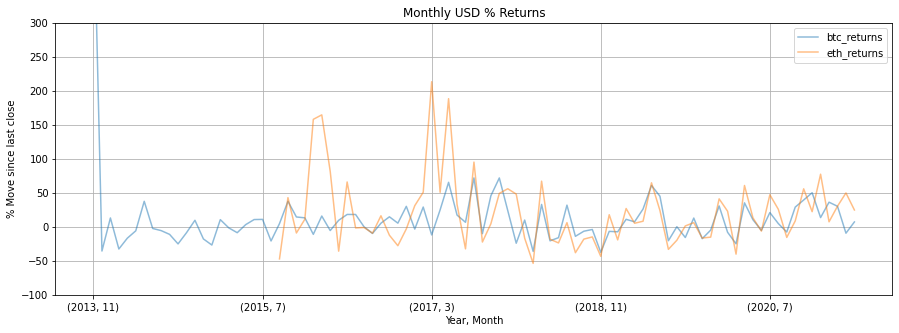

In [51]:
# Plot
(returns_df*100).loc[:,['btc_returns','eth_returns']] \
                .plot(figsize=[15,5], alpha=0.5, grid=True, \
                      xlabel='Year, Month', \
                      ylim=[-100, 300],  ylabel='% Move since last close', \
                      title='Monthly USD % Returns');

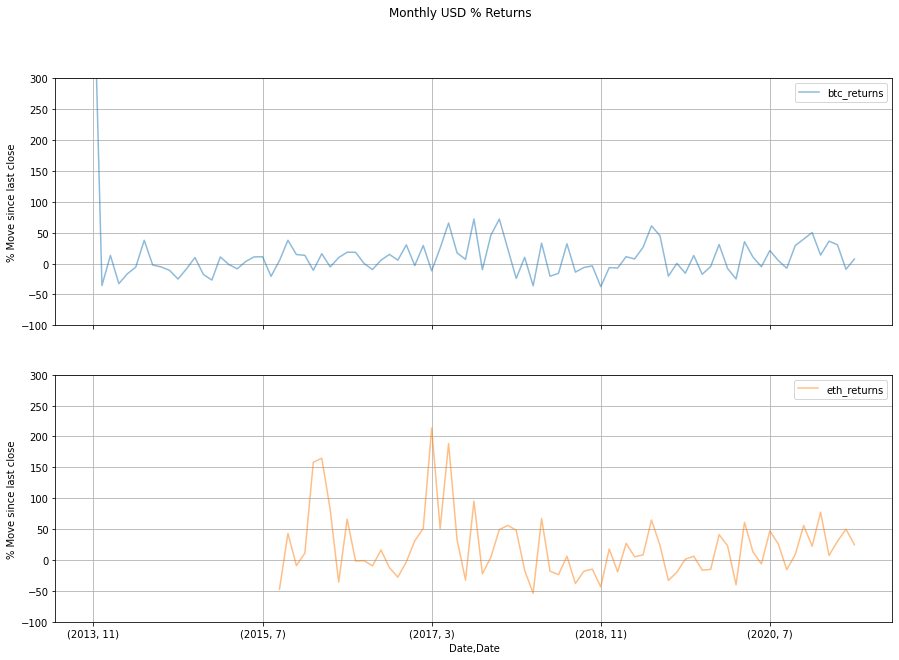

In [52]:
# Plot
(returns_df*100).loc[:,['btc_returns','eth_returns']] \
                .plot(figsize=[15,10], alpha=0.5, grid=True, \
                      ylim=[-100, 300],  ylabel='% Move since last close', \
                      title='Monthly USD % Returns', \
                      subplots=True);

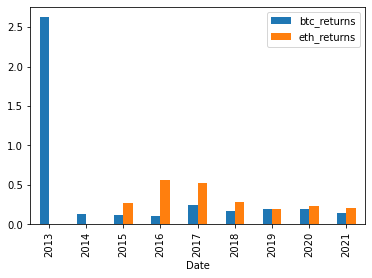

In [57]:
returns_df.groupby(returns_df.index.get_level_values(0)).mad().plot(kind='bar');

In [61]:
from datetime import datetime

In [65]:
returns_df.loc[returns_df.index>=(2018, 1)].mean()

btc_returns    0.063793
eth_returns    0.090818
dtype: float64